# Problem Statement:

The importance of early diagnosis and treatment of heart issues cannot be overstated, that is why M-- Hospital has tasked us with developing a predictive model for patient data to indicate their likelihood of heart disease given a variety of easily obtained patient data. This would result in quicker action being taken when certain indications are made, and a potential implementation of the model into the M-- Hospital computer system to automatically order Troponin tests if the patient falls within the heart diesase category.

# Data Wangling:

We were presented with quite nice data for the project: 12 columns with 918 total entries.

The columns are as follows:
Patient Age, Sex, Chest Pain Type (as diagnosed by nurse), Resting Blood Pressure, Cholesterol,  Fasting Blood Sugar, Resting Electrocardiogram (as diagnosed by imaging), Maximum Heart Rate, Whether the angia was induced by exercise (meaning was the patient exercising when the issue emerged), Oldpeak Electrocardiogram results, ST slope electrocardiogram results, and the output class Heart Disease.


There were only two issues of outliers or null entries. The first was a missed entry in the Blood Pressure category, which we simply dropped. The second was a missed entry in the Cholesterol category which we assigned to the median value so as not to change the ceentral tendency of the data. 

# Exploratory Data Analysis:

Before diving in too deep I looked at a sex breakdown of the data, because it is worth noting that heart disease often manifests differently for women than men. The pain in the arm people are often told to look for, for example, often manifests in women more often as a general neck or shoulder pain. 

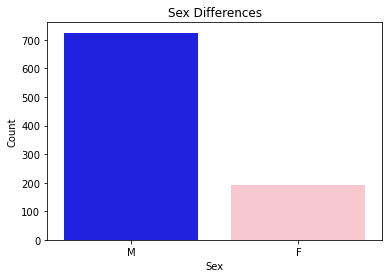

The data skews heavily towards men. There is not much we can do to account for this right now, but we will make a recommendation that in future data gathering efforts this is accounted for. 

Next we looked at a spread of ages:

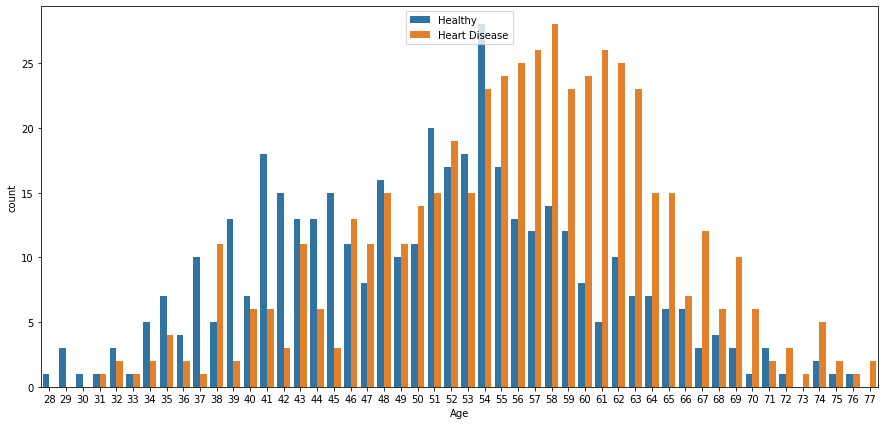

This is more or less what is expected. As people get older they are likelier to develop all sorts of complications, and heart disease among the youth is relatively rare. But age alone is not enough of a correlation to base a model off of, so we do need to go deeper.

Using the seaborn we plot a correlation heatmap, we are concerned with whichever columns have a high correlation (approaching 0.7 will be ideal) with Heart Disease. The higher the correlation the brighter the color. However, we don't want a fully light 1.0 correlation because that typically means an overlap:
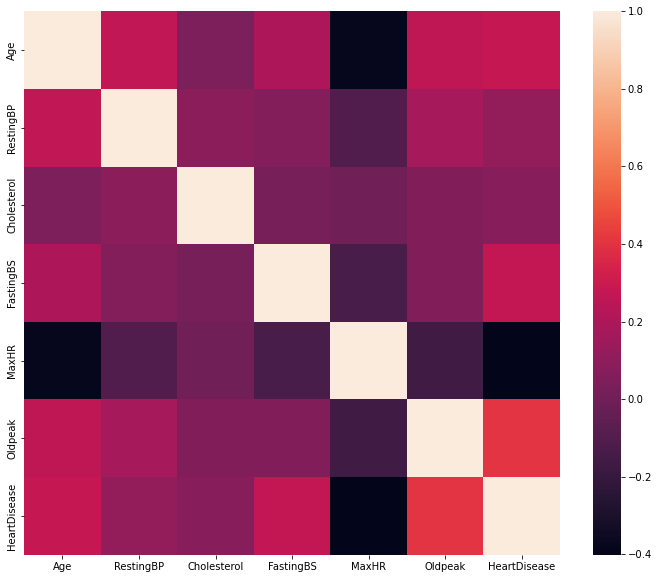

So it appears OldPeak is a strong contender. This makes sense because OldPeak represents the ST depression under exercise, and a typical form of diagnosis/prognosis is the cardiac stress test which tests this very thing. It does fall slightly short of our desired 0.7, but it is the best of the bunch.

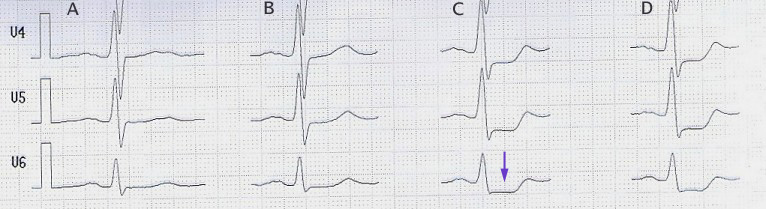

(Here is an example of extended ST depression on an ECG printout printed during a stress test)

# Modeling:

We split and scale the data in order to apply it to a Logistic Regression, Random Forest, and Decision tree model. We then evaluated each model based on the precision, recall, F1 score, and overall accuracy. The highest scoring model was logistic regression with a 83% accuracy. 

We can run additional evaluations on the model to make sure it is functioning as intended. First we plotted the feature importances to make sure that the model indicated the appropriate importance of OldPeak as the highest indicator of Heart Disease. 

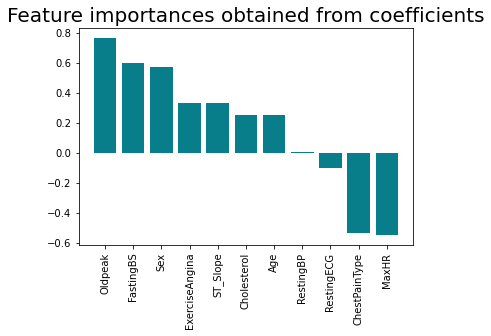

This falls within expectations.

Next we checked the ROC/AUC which plots the true positive rate v false positive rate and measures the area beneath the created arc. Roughly, the higher the number the better:

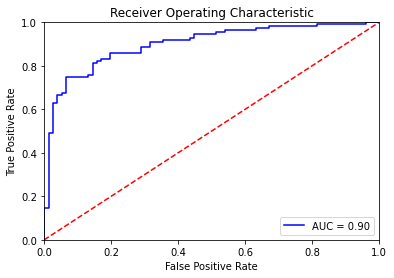

A score of .90 is great.

# Hyperparameters:

Next we ran a GridSearchCV on the Logistic Regression model to see if we could improve the c value of the model, resulting in higher accuracy by tweaking how much weight is given to the training data v the test data. 

The GridSearch indicated a c value of 1 with an accuracy of 82%. Given that this falls within 1% of our current model, tweaking the hyperparameters seems to be a useful enough step to ensure we are using the best possible model. 

# Takeaway:

The Logistic Regression model is the highest perorming model. We want to focus most on minimizing false negatives which would mean an undiagnosed case of heart disease, which we have done (the False Negatives are in the lower left).

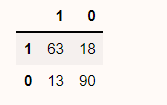

An unfortunate issue with the data is the sex breakdown, which scores nearly a .6 on the feature importance, but is skewed rather heavily. More testing with a closer to equal number of male and female patients is desireable. 

Interestingly, the type of chest pain, which is a rather difficult piece of information to qualify--as it must pass from the patient's self-evaluation to the evaluation of the heart doctor, to a metric of one of four classifications--scores very low on feature importance. This should not be taken as data to ifnore the patient's evaluations of their own pain, as there are many reasons other than diagnosis why that is important, but it does seem to indicate that patient interviews should not take priority over ECGs.

The model does indicate that a system that automatically orders Troponin tests given the presence of extended ST depression should be implemented given the feature importance of OldPeak in the prediction of Heart Disease. 